In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Understanding and Cleaning

In [2]:
#Reading the data as dataframe
vcl = pd.read_csv('vehicle.csv')

In [3]:
#Checking the first 5 columns
vcl.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#Checking the shape
vcl.shape

(846, 19)

In [5]:
#Checking the dattypes
vcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [6]:
#Checking the missing values
vcl.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are some missing values in the dataset.

In [7]:
#Calculating percentages of missing values in each column
for i in vcl.columns:
    print('Percentage of missing values in',i,'is:',round(vcl[i].isnull().sum()/len(vcl)*100,2))

Percentage of missing values in compactness is: 0.0
Percentage of missing values in circularity is: 0.59
Percentage of missing values in distance_circularity is: 0.47
Percentage of missing values in radius_ratio is: 0.71
Percentage of missing values in pr.axis_aspect_ratio is: 0.24
Percentage of missing values in max.length_aspect_ratio is: 0.0
Percentage of missing values in scatter_ratio is: 0.12
Percentage of missing values in elongatedness is: 0.12
Percentage of missing values in pr.axis_rectangularity is: 0.35
Percentage of missing values in max.length_rectangularity is: 0.0
Percentage of missing values in scaled_variance is: 0.35
Percentage of missing values in scaled_variance.1 is: 0.24
Percentage of missing values in scaled_radius_of_gyration is: 0.24
Percentage of missing values in scaled_radius_of_gyration.1 is: 0.47
Percentage of missing values in skewness_about is: 0.71
Percentage of missing values in skewness_about.1 is: 0.12
Percentage of missing values in skewness_about.

In [8]:
#Creating function to replace the missing values with median
def replace(df):
    for i in df.columns:
        if vcl[i].isnull().sum() != 0:
            df[i] = df[i].fillna(df[i][df[i].isnull()==False].median())
    return df

In [9]:
#Replacing the missing values
replace(vcl)

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [10]:
#Checking the missing values after replacement
vcl.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [11]:
#Checking the duplicat rows in the dataset
vcl.duplicated().any()

False

There is no duplicate values in the dataset.

car    429
bus    218
van    199
Name: class, dtype: int64


([<matplotlib.patches.Wedge at 0x2468f195820>,
 [Text(-0.04901355900889624, 2.199453948377479, 'car'),
  Text(-1.4451788797164768, -1.65875194216056, 'bus'),
  Text(1.6261431798442079, -1.4817754076263274, 'van')],
 [Text(-0.02673466855030704, 1.1997021536604429, '50.71'),
  Text(-0.78827938893626, -0.9047737866330327, '25.77'),
  Text(0.8869871890059314, -0.8082411314325422, '23.52')])

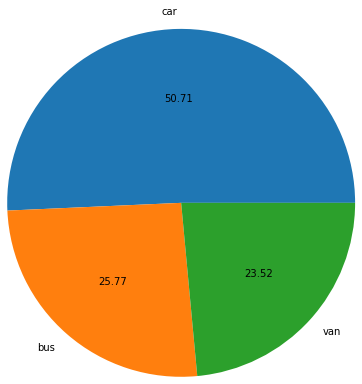

In [12]:
#Plotting pie chart for class variable
print(vcl['class'].value_counts())
plt.pie(vcl['class'].value_counts(),labels=['car','bus','van'],autopct='%0.04g',radius=2)

50.71% values is of category car.

In [54]:
#Plotting the distribution of continuous variable
def dist(df_pie):
   
    cols = df_pie.columns[:-1]
    plt.figure(figsize=(20, 25))
    plt.suptitle("Distribution plot for continuous variable", fontsize=18, y=0.95)
    
    # number of columns
    ncols = 3
    # calculate number of rows
    nrows = (len(cols) // ncols)+1
    
    # loop through the length of 'b' and keep track of index
    for n, col in zip(np.arange(len(cols)),cols):
        ax = plt.subplot(nrows, ncols, n+1)
        sns.histplot(vcl[col],ax=ax,kde=True)  
    plt.show()

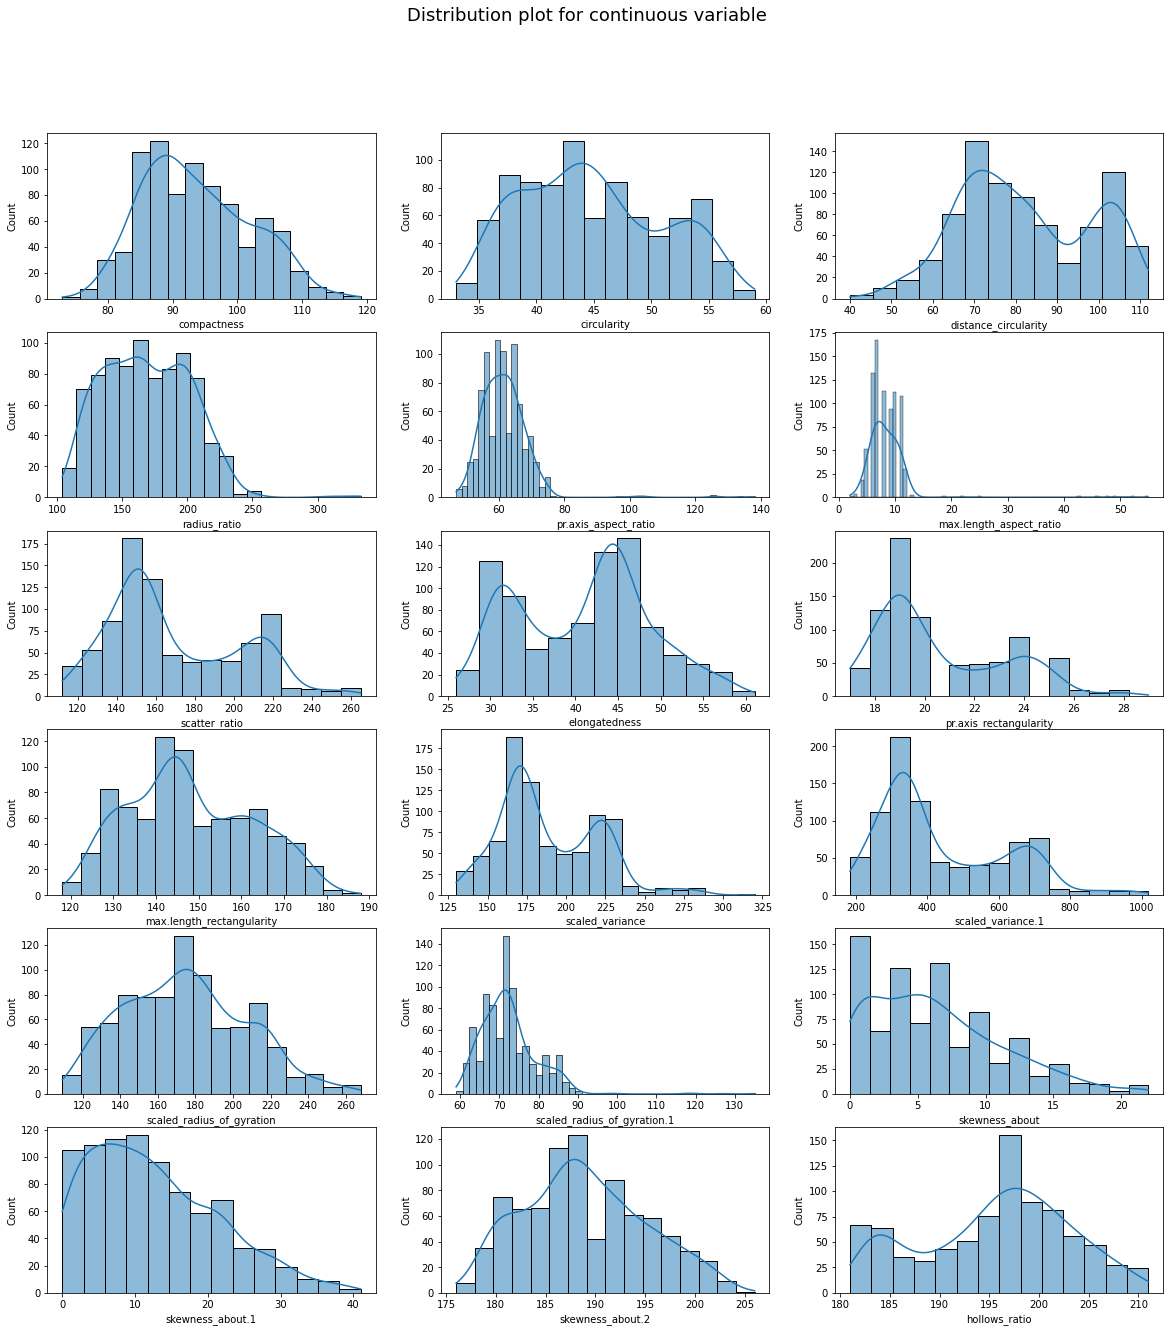

In [56]:
dist(vcl)

There is no proper distribution.

In [57]:
#Checking the summary of the data
vcl.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

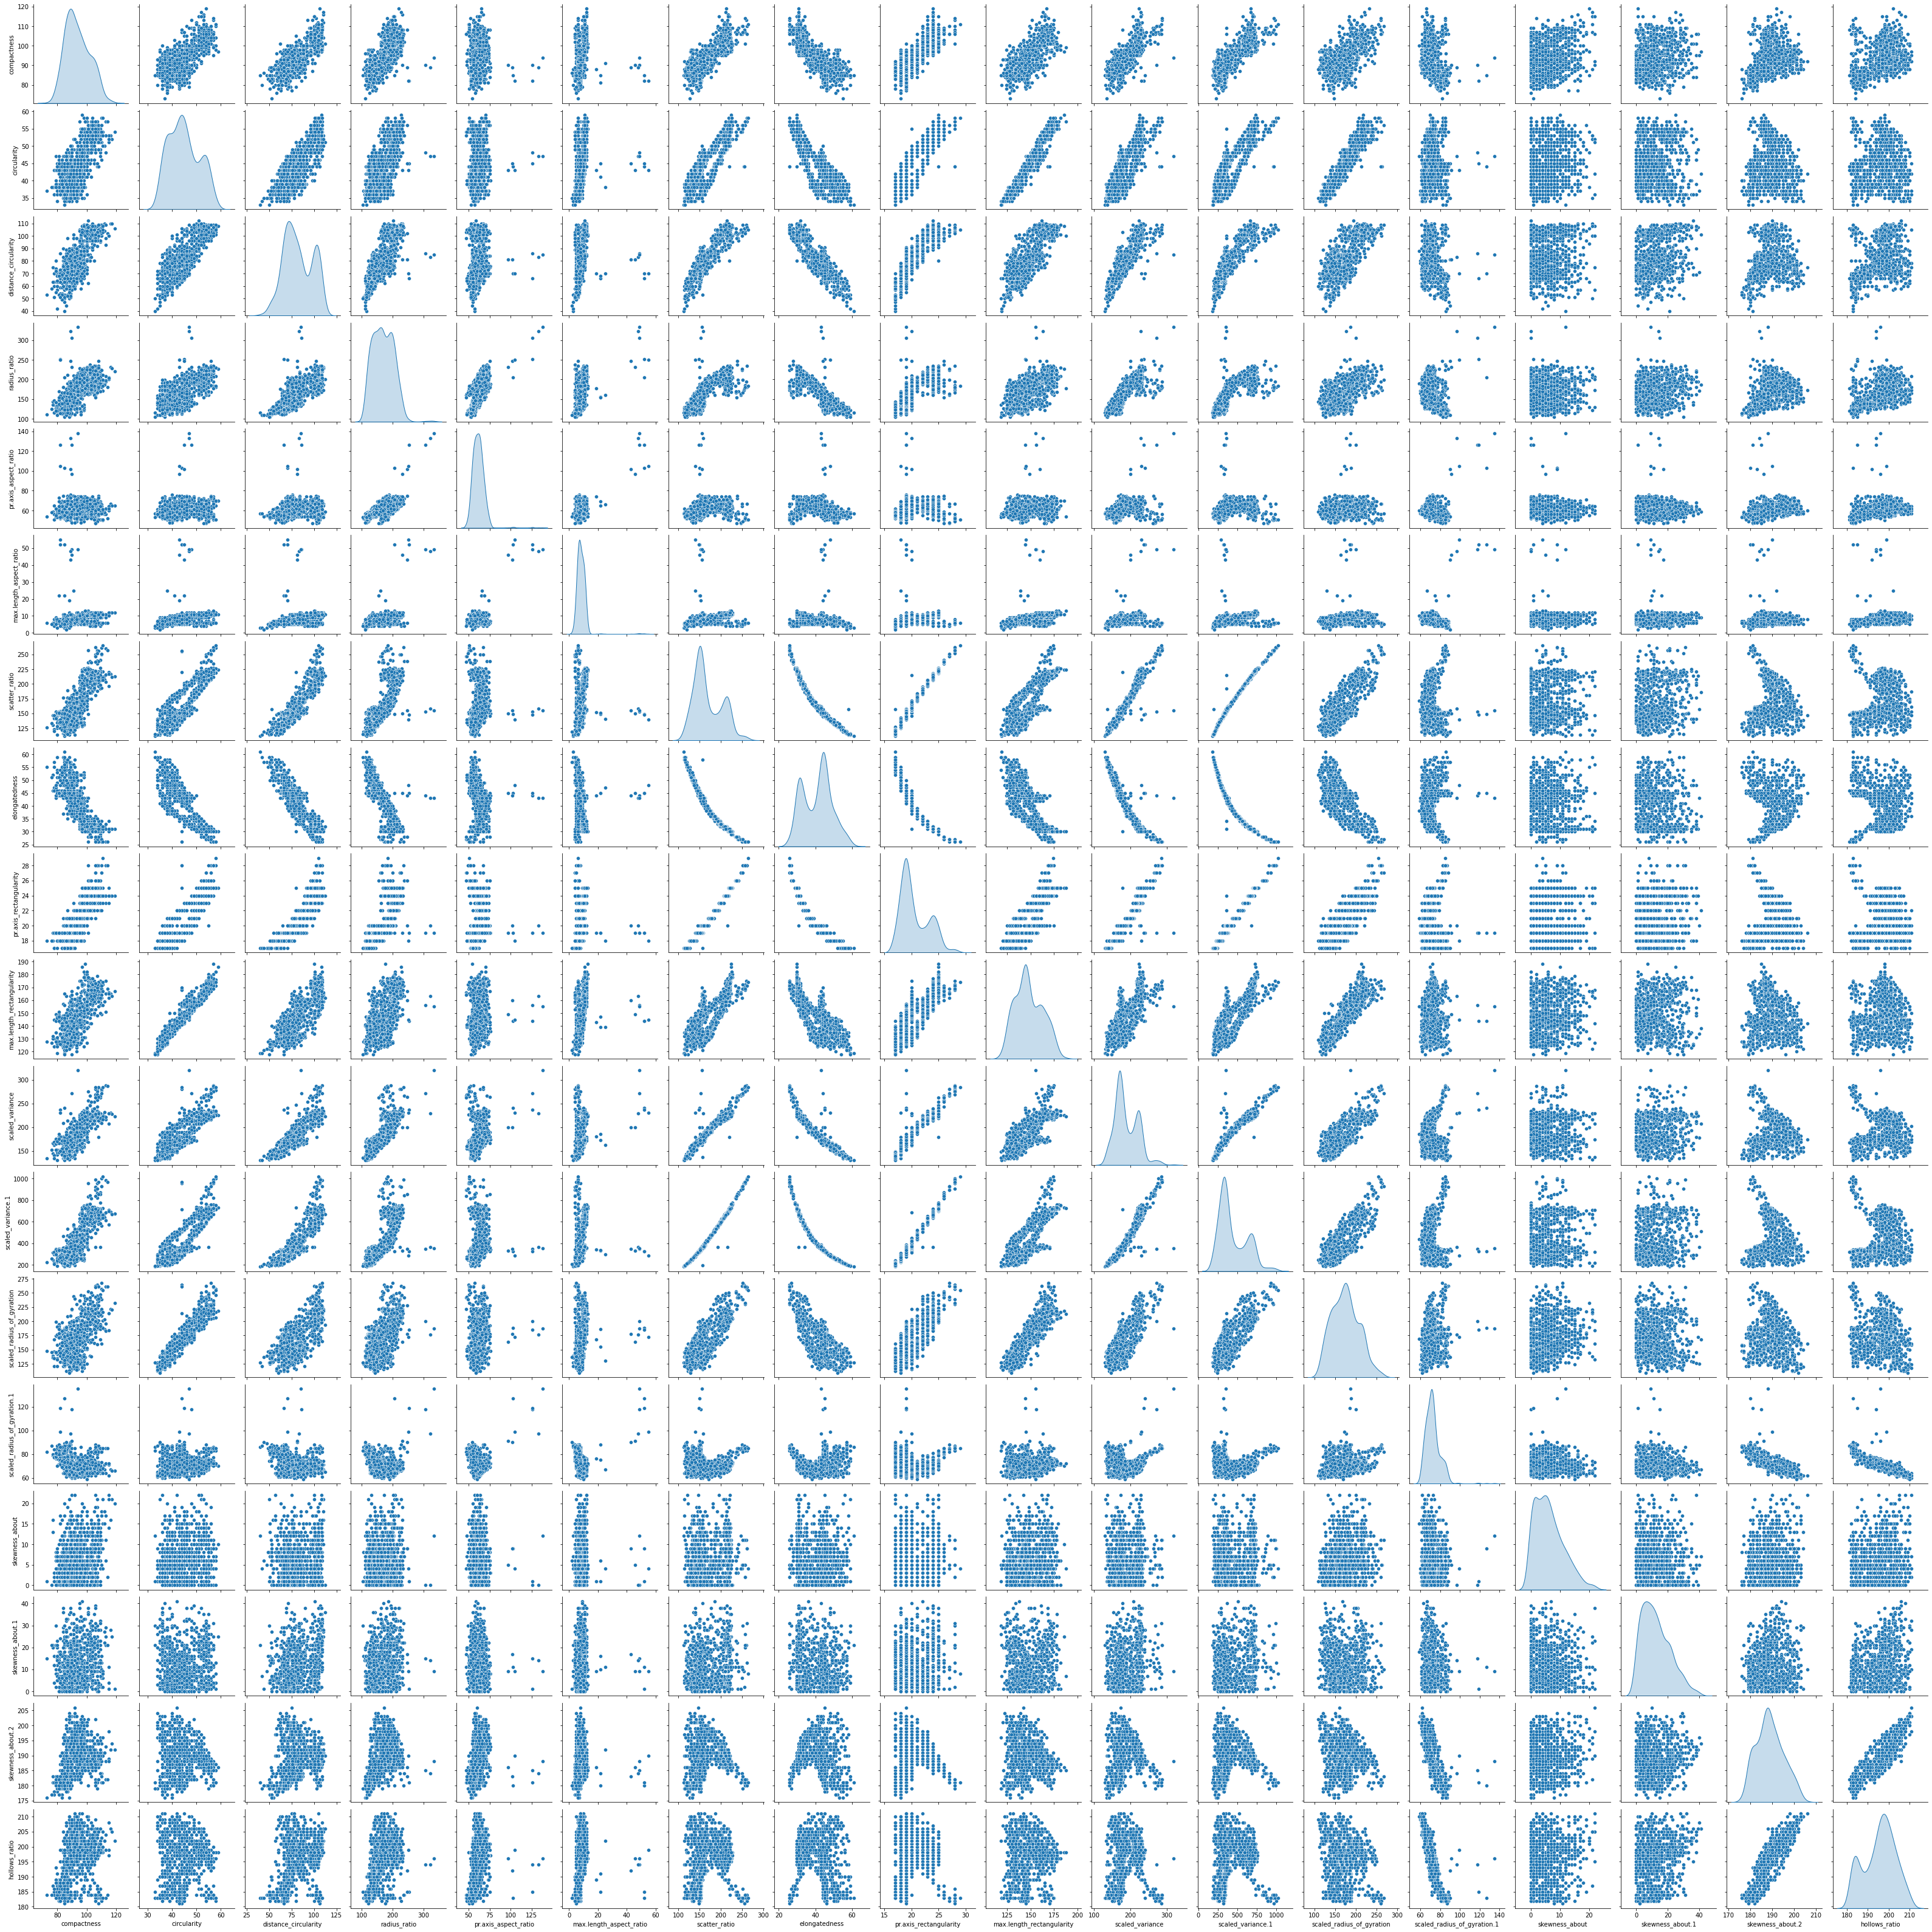

In [58]:
#Plotting pairplot for all the continuouc variable
sns.pairplot(vcl,diag_kind='kde')

we can see that, there is a relationship between some of the variables.

<AxesSubplot:>

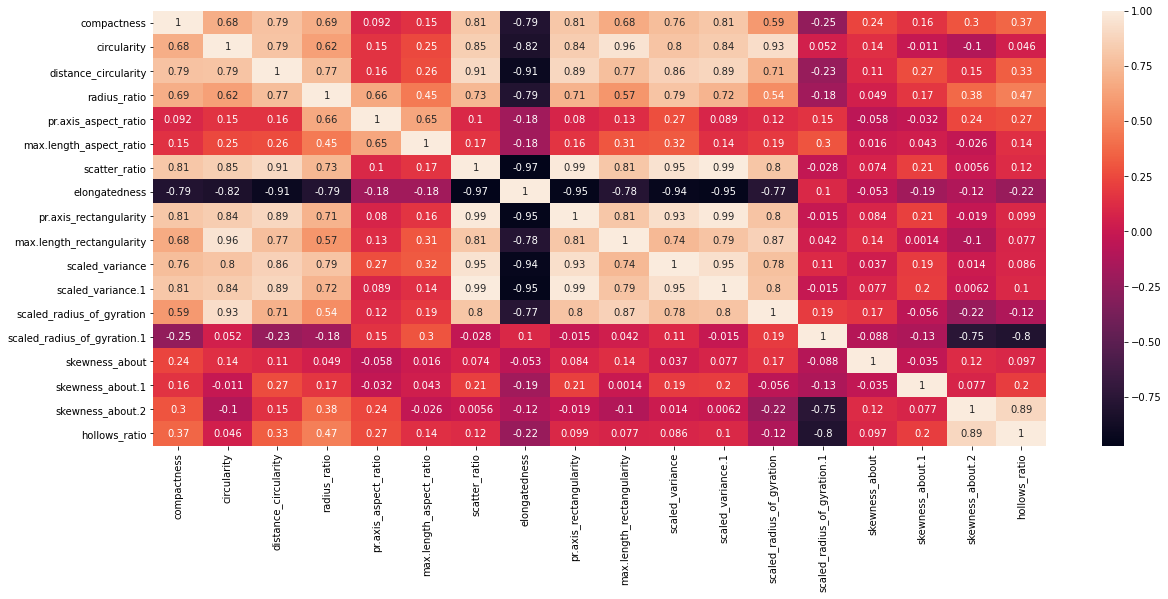

In [59]:
#Checking the correletion
plt.figure(figsize=(20,8))
sns.heatmap(vcl.corr(),annot=True,fmt='0.2g')

* We are not removing the correlated feature now as we will be doing PCA, which will take care of the correlated feature.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'compactness'),
  Text(2, 0, 'circularity'),
  Text(3, 0, 'distance_circularity'),
  Text(4, 0, 'radius_ratio'),
  Text(5, 0, 'pr.axis_aspect_ratio'),
  Text(6, 0, 'max.length_aspect_ratio'),
  Text(7, 0, 'scatter_ratio'),
  Text(8, 0, 'elongatedness'),
  Text(9, 0, 'pr.axis_rectangularity'),
  Text(10, 0, 'max.length_rectangularity'),
  Text(11, 0, 'scaled_variance'),
  Text(12, 0, 'scaled_variance.1'),
  Text(13, 0, 'scaled_radius_of_gyration'),
  Text(14, 0, 'scaled_radius_of_gyration.1'),
  Text(15, 0, 'skewness_about'),
  Text(16, 0, 'skewness_about.1'),
  Text(17, 0, 'skewness_about.2'),
  Text(18, 0, 'hollows_ratio')])

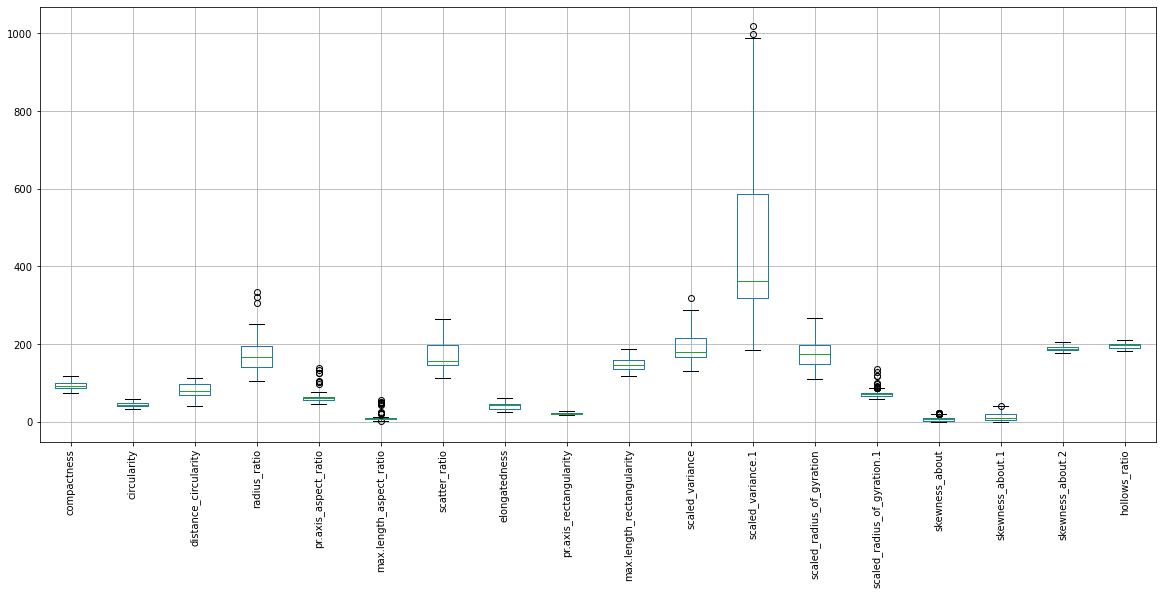

In [60]:
plt.figure(figsize=(20,8))
vcl.boxplot()
plt.xticks(rotation=90)

In [67]:
#Replacing Outlier with median value
for col in vcl.columns[:-1]:
    q1 = vcl[col].quantile(0.25)
    q3 = vcl[col].quantile(0.75)
    iqr = q3-q1
    low_fence = q1 - (1.5*iqr)
    up_fence = q3 + (1.5*iqr)
    include = vcl[col][(vcl[col]>low_fence) &(vcl[col]<up_fence)]
    median = include.median()
    vcl[col] = np.where(vcl[col] <low_fence,median,vcl[col])
    vcl[col] = np.where(vcl[col] >up_fence,median,vcl[col])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'compactness'),
  Text(2, 0, 'circularity'),
  Text(3, 0, 'distance_circularity'),
  Text(4, 0, 'radius_ratio'),
  Text(5, 0, 'pr.axis_aspect_ratio'),
  Text(6, 0, 'max.length_aspect_ratio'),
  Text(7, 0, 'scatter_ratio'),
  Text(8, 0, 'elongatedness'),
  Text(9, 0, 'pr.axis_rectangularity'),
  Text(10, 0, 'max.length_rectangularity'),
  Text(11, 0, 'scaled_variance'),
  Text(12, 0, 'scaled_variance.1'),
  Text(13, 0, 'scaled_radius_of_gyration'),
  Text(14, 0, 'scaled_radius_of_gyration.1'),
  Text(15, 0, 'skewness_about'),
  Text(16, 0, 'skewness_about.1'),
  Text(17, 0, 'skewness_about.2'),
  Text(18, 0, 'hollows_ratio')])

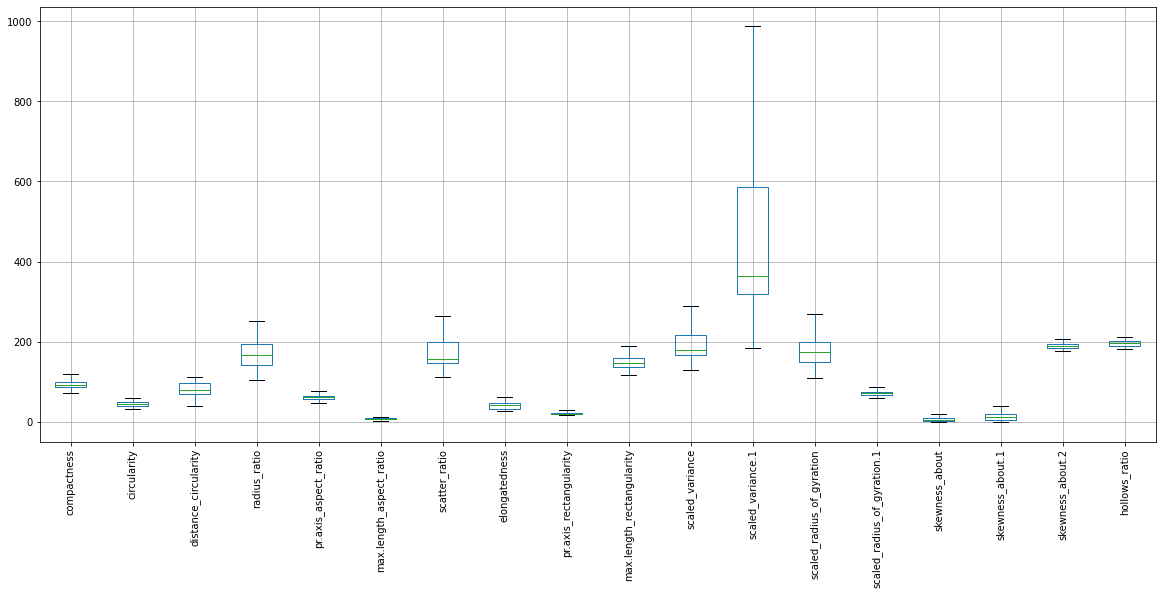

In [69]:
#Boxplot after replacing outlier
plt.figure(figsize=(20,8))
vcl.boxplot()
plt.xticks(rotation=90)

# Data Preparation

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
#Separating feature and target variable
x = vcl.drop('class',axis=1)
y = vcl['class']

In [82]:
#Splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=1)

In [92]:
#Scaling the data
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# Model Building

In [93]:
from sklearn.svm import SVC

In [94]:
#Building and training the SVC model
svc = SVC()
svc.fit(x_train_scaled, y_train)

SVC()

In [95]:
#Prediction for training set
y_train_pred = svc.predict(x_train_scaled)

In [96]:
#Prediction for testing set
y_test_pred = svc.predict(x_test_scaled)

In [97]:
#Accuracy score of training set
svc.score(x_train_scaled,y_train)

0.9733727810650887

In [98]:
#Accuracy score of testing
svc.score(x_test_scaled,y_test)

0.9588235294117647

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

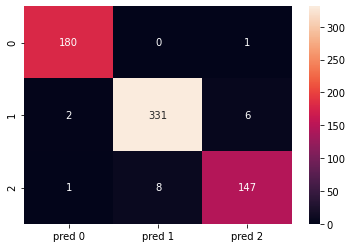

In [100]:
#Confusion matrix for training set
cm1 = pd.DataFrame(confusion_matrix(y_train, y_train_pred),columns=['pred 0','pred 1','pred 2'])
sns.heatmap(cm1,annot=True,fmt='0.4g')

In [101]:
#Printing classification report for training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         bus       0.98      0.99      0.99       181
         car       0.98      0.98      0.98       339
         van       0.95      0.94      0.95       156

    accuracy                           0.97       676
   macro avg       0.97      0.97      0.97       676
weighted avg       0.97      0.97      0.97       676



<AxesSubplot:>

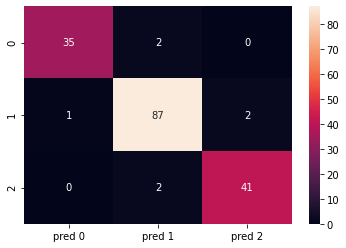

In [102]:
#Confusion matrix for testing set
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test_pred),columns=['pred 0','pred 1','pred 2'])
sns.heatmap(cm1,annot=True,fmt='0.4g')

In [103]:
#Printing classification report for testing set
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         bus       0.97      0.95      0.96        37
         car       0.96      0.97      0.96        90
         van       0.95      0.95      0.95        43

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



# Reducing Dimensionality (PCA)

In [105]:
#Reducing the dimensions of the data
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scale.transform(x))

PCA()

In [106]:
#Eigen values
print(pca.explained_variance_)

[9.64074303e+00 3.31995357e+00 1.20096291e+00 1.13580483e+00
 8.93040957e-01 6.67822695e-01 3.17297114e-01 2.27152316e-01
 1.31323380e-01 7.95311442e-02 7.19350111e-02 6.36949672e-02
 3.95671304e-02 3.19034981e-02 2.90688707e-02 2.23728094e-02
 1.99075457e-02 5.08572154e-03]


In [107]:
#Eigen vectors
print(pca.components_)

[[ 2.73019945e-01  2.90303473e-01  3.00956687e-01  2.69136099e-01
   9.91939704e-02  1.95915489e-01  3.09678516e-01 -3.09163360e-01
   3.06672074e-01  2.83161568e-01  2.97047760e-01  3.02549018e-01
   2.63641918e-01 -4.13218792e-02  3.67987680e-02  5.78779059e-02
   3.82408280e-02  8.41861672e-02]
 [-8.73817987e-02  1.32689341e-01 -4.57019070e-02 -1.98915804e-01
  -2.63155393e-01 -1.06349780e-01  7.45050161e-02 -1.24657551e-02
   8.69029429e-02  1.24416213e-01  7.55028662e-02  7.01569900e-02
   2.10019410e-01  4.98773417e-01 -1.42629415e-02 -9.12944841e-02
  -5.07634172e-01 -5.04050124e-01]
 [ 7.58387193e-02  1.71476008e-01 -3.40178664e-02 -1.17300872e-01
  -1.02181843e-01  1.89948023e-01 -1.00100737e-01  1.02894171e-01
  -9.05200937e-02  2.02308678e-01 -1.49289234e-01 -1.01777022e-01
   1.64573944e-01 -9.37832511e-02  7.19153604e-01 -4.90799886e-01
   5.81704542e-02  6.08306249e-02]
 [ 1.25541915e-01 -1.03071624e-01  1.22131467e-01 -2.18585994e-01
  -6.06857739e-01  2.05523064e-01  4.

In [108]:
#Percentage of variation explained by each eigen Vector
print(pca.explained_variance_ratio_)

[5.38674236e-01 1.85501620e-01 6.71035186e-02 6.34628264e-02
 4.98984522e-02 3.73144351e-02 1.77289012e-02 1.26920819e-02
 7.33766278e-03 4.44378386e-03 4.01935172e-03 3.55894122e-03
 2.21080405e-03 1.78260041e-03 1.62421627e-03 1.25007543e-03
 1.11232941e-03 2.84163488e-04]


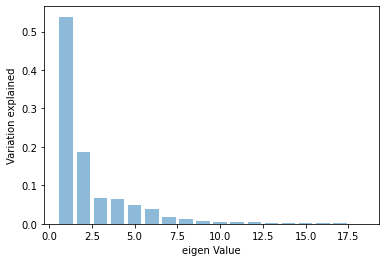

In [109]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

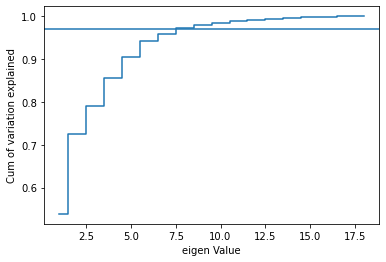

In [111]:
#Plotting Cumulative Variance Explained with Number of Components
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(0.97)
plt.show()

Lets select num of components = 10

In [112]:
#Applying pca with 10 components
pca10 = PCA(n_components=10)
pca10.fit(scale.transform(x))

PCA(n_components=10)

In [113]:
#Eigen values
print(pca10.explained_variance_)

[9.64074303 3.31995357 1.20096291 1.13580483 0.89304096 0.66782269
 0.31729711 0.22715232 0.13132338 0.07953114]


In [114]:
#Eigen vectors
print(pca10.components_)

[[ 0.27301995  0.29030347  0.30095669  0.2691361   0.09919397  0.19591549
   0.30967852 -0.30916336  0.30667207  0.28316157  0.29704776  0.30254902
   0.26364192 -0.04132188  0.03679877  0.05787791  0.03824083  0.08418617]
 [-0.0873818   0.13268934 -0.04570191 -0.1989158  -0.26315539 -0.10634978
   0.07450502 -0.01246576  0.08690294  0.12441621  0.07550287  0.07015699
   0.21001941  0.49877342 -0.01426294 -0.09129448 -0.50763417 -0.50405012]
 [ 0.07583872  0.17147601 -0.03401787 -0.11730087 -0.10218184  0.18994802
  -0.10010074  0.10289417 -0.09052009  0.20230868 -0.14928923 -0.10177702
   0.16457394 -0.09378325  0.7191536  -0.49079989  0.05817045  0.06083062]
 [ 0.12554192 -0.10307162  0.12213147 -0.21858599 -0.60685774  0.20552306
   0.04148611  0.03033235  0.06449601 -0.03342375 -0.0112427   0.03502458
  -0.14562982 -0.08849186  0.29425668  0.60644805 -0.03541529  0.080455  ]
 [ 0.1186027  -0.14709484 -0.07696997  0.15052302  0.16188923 -0.6419524
   0.09099726 -0.087804    0.085561

In [115]:
#Percentage of variation explained by each eigen Vector
print(pca10.explained_variance_ratio_)

[0.53867424 0.18550162 0.06710352 0.06346283 0.04989845 0.03731444
 0.0177289  0.01269208 0.00733766 0.00444378]


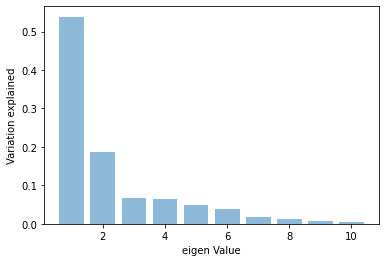

In [116]:
plt.bar(list(range(1,11)),pca10.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [117]:
#Reducing the dimensionality of train and test data
x_train_pca10 = pca10.fit_transform(x_train_scaled)
x_test_pca10 = pca10.transform(x_test_scaled)

In [118]:
#Training the model
svc1 = SVC()
svc1.fit(x_train_pca10,y_train)

SVC()

In [119]:
#Prediction for training set
y_train_pred = svc1.predict(x_train_pca10)

In [120]:
#Prediction for testing set
y_test_pred = svc1.predict(x_test_pca10)

In [121]:
#Accuracy score of training set
svc1.score(x_train_pca10,y_train)

0.9600591715976331

In [122]:
#Accuracy score of testing set
svc1.score(x_test_pca10,y_test)

0.9529411764705882

<AxesSubplot:>

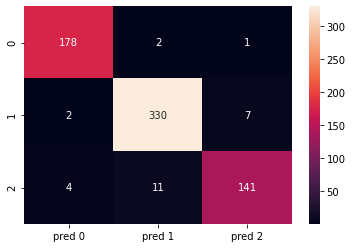

In [123]:
#Confusion matrix for training set
cm1 = pd.DataFrame(confusion_matrix(y_train, y_train_pred),columns=['pred 0','pred 1','pred 2'])
sns.heatmap(cm1,annot=True,fmt='0.4g')

In [124]:
#printing classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         bus       0.97      0.98      0.98       181
         car       0.96      0.97      0.97       339
         van       0.95      0.90      0.92       156

    accuracy                           0.96       676
   macro avg       0.96      0.95      0.96       676
weighted avg       0.96      0.96      0.96       676



<AxesSubplot:>

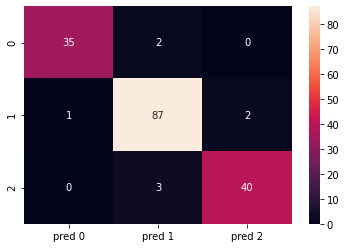

In [125]:
#Confusion matrix for testing set
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test_pred),columns=['pred 0','pred 1','pred 2'])
sns.heatmap(cm1,annot=True,fmt='0.4g')

In [126]:
#printing classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         bus       0.97      0.95      0.96        37
         car       0.95      0.97      0.96        90
         van       0.95      0.93      0.94        43

    accuracy                           0.95       170
   macro avg       0.96      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



* Training Accuracy of the model decreases a little bit, but testing accuracy remains same and both training and testing accuracy is close. So, PCA helps reducing the overfitting along with multicollineaity of the data.
* There is very very less information loss during PCA.
* We get training accuracy of 96% and testing accuracy of 95%.
* So we can go ahead with the model.

# Performance Improvement

In [127]:
from sklearn.model_selection import GridSearchCV

In [128]:
svc2 = SVC()

In [129]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','poly']} 

In [130]:
grid = GridSearchCV(svc2, param_grid, refit = True, verbose = 3)

In [131]:
# fitting the model for grid search
grid.fit(x_train_pca10, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.896 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.926 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.896 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.889 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 5/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.556 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.874 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.896 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.889 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.896 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.500 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.496 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.504 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.504 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.504 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END ........C=100, 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [132]:
#Finding the best parameter
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [133]:
#Training the model with best parameter
svc2= SVC(C=10,gamma=0.1,kernel='rbf')
svc2.fit(x_train_pca10,y_train)

SVC(C=10, gamma=0.1)

In [134]:
#Prediction for training set
y_train_pred = svc2.predict(x_train_pca10)

In [135]:
#Prediction for testing set
y_test_pred = svc2.predict(x_test_pca10)

In [136]:
#Accuracy of trainging set
svc2.score(x_train_pca10,y_train)

0.9940828402366864

In [137]:
#Accuracy of testing set
svc2.score(x_test_pca10,y_test)

0.9529411764705882

<AxesSubplot:>

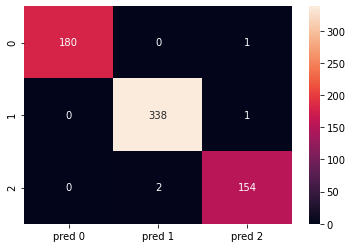

In [138]:
#Confusion matrix for training set
cm1 = pd.DataFrame(confusion_matrix(y_train, y_train_pred),columns=['pred 0','pred 1','pred 2'])
sns.heatmap(cm1,annot=True,fmt='0.4g')

In [139]:
#printing classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         bus       1.00      0.99      1.00       181
         car       0.99      1.00      1.00       339
         van       0.99      0.99      0.99       156

    accuracy                           0.99       676
   macro avg       0.99      0.99      0.99       676
weighted avg       0.99      0.99      0.99       676



<AxesSubplot:>

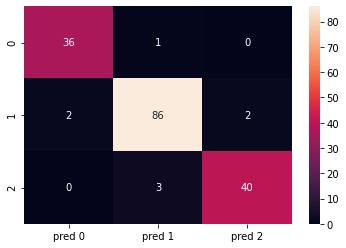

In [140]:
#Confusion matrix for testing set
cm1 = pd.DataFrame(confusion_matrix(y_test, y_test_pred),columns=['pred 0','pred 1','pred 2'])
sns.heatmap(cm1,annot=True,fmt='0.4g')

In [141]:
#printing classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         bus       0.95      0.97      0.96        37
         car       0.96      0.96      0.96        90
         van       0.95      0.93      0.94        43

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



* Training Accuracy of the model improved to 99% , but testing accuracy remains same.
* Tuning the model cause the overfitiing of the model.
* So we can go ahead with the svc1 model

In [142]:
#Saving the trained the model
import pickle
filename = 'trained_model.sav'
pickle.dump(svc1,open(filename,'wb'))

In [146]:
#Loading the savel model
loaded_model = pickle.load(open('trained_model.sav','rb'))
loaded_model.predict(x_test_pca10)

array(['van', 'bus', 'bus', 'bus', 'car', 'car', 'van', 'van', 'van',
       'van', 'van', 'van', 'bus', 'car', 'bus', 'car', 'van', 'bus',
       'van', 'bus', 'car', 'car', 'car', 'car', 'van', 'van', 'bus',
       'car', 'car', 'car', 'car', 'van', 'bus', 'car', 'car', 'car',
       'bus', 'car', 'bus', 'bus', 'car', 'van', 'van', 'car', 'car',
       'van', 'car', 'car', 'car', 'car', 'car', 'car', 'bus', 'car',
       'car', 'van', 'car', 'car', 'van', 'bus', 'car', 'van', 'car',
       'van', 'bus', 'car', 'car', 'car', 'car', 'car', 'car', 'van',
       'car', 'van', 'bus', 'car', 'car', 'car', 'van', 'car', 'car',
       'van', 'car', 'car', 'bus', 'car', 'van', 'car', 'bus', 'bus',
       'car', 'bus', 'van', 'car', 'van', 'van', 'bus', 'bus', 'bus',
       'car', 'car', 'car', 'van', 'van', 'van', 'car', 'car', 'car',
       'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'van', 'car',
       'van', 'van', 'car', 'car', 'van', 'car', 'van', 'car', 'car',
       'van', 'car',

In [147]:
#Saving the scaled model
filename1 = 'trained_model_scaled.sav'
pickle.dump(scale,open(filename1,'wb'))

In [148]:
#Loading the scaled model
loaded_model_scaled = pickle.load(open('trained_model_scaled.sav','rb'))

In [149]:
#Saving the PCA model
filename3 = 'trained_model_pca.sav'
pickle.dump(pca10,open(filename3,'wb'))

In [151]:
#Loading the pca model
loaded_model_pca = pickle.load(open('trained_model_pca.sav','rb'))